# Import libraries that will be used 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Import the dataset 

In [2]:
df=pd.read_csv("Customer_Churn.csv")

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [5]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,NaN


In [6]:
df.shape

(7043, 30)

In [7]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Reason'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
#change the total chearges from object type to float type.
df["Total Charges"] =  pd.to_numeric(df['Total Charges'], errors='coerce')
print(df.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Reason          object
dtype: object


In [10]:
# describe() method to get the description of the data in the DataFrame (count,mean,std,min,25%,50%,75%,max)
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000


In [11]:
df.describe(include="object")

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,3,2,4,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


In [12]:
#drop the columns with only one unqiue value
df.drop(columns=["Country","State","Count"],inplace=True)

In [13]:
df.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Moved
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Competitor had better devices


In [14]:
#handling the missing value in churn reason

#although there is a majority of missing values, the available data can still provide valuable insights into customer behavior

#fill the missing value as Not Available

df["Churn Reason"]=df['Churn Reason'].fillna('Not Available')


In [15]:
Not_Available=df.loc[df["Churn Reason"]=="Not Available"]
Not_Available.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
1869,7590-VHVEG,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Not Available
1870,5575-GNVDE,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Not Available
1871,7795-CFOCW,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Not Available
1872,1452-KIOVK,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Not Available
1873,6713-OKOMC,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Not Available


In [16]:
df.isnull().sum() #check how many null values

CustomerID            0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Reason          0
dtype: int64

In [17]:
#total charges as 11 null values, the best Strategy would to replace the null values with mean
mean=df["Total Charges"].mean(skipna = True)
df["Total Charges"]=df["Total Charges"].fillna(mean)

In [18]:
df.isnull().sum()

CustomerID           0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Reason         0
dtype: int64

# Data Analysis and Visualisation

In [19]:
#color palette for the visualisations.
rocket_palette = ['#8E3270', '#DA595E']

In [20]:
#Get the churn rate by dividing the churned customers over total customers.
total_customer=len(df)
churned_customer=df["Churn Label"].value_counts()['Yes']
churn_rate=churned_customer/total_customer


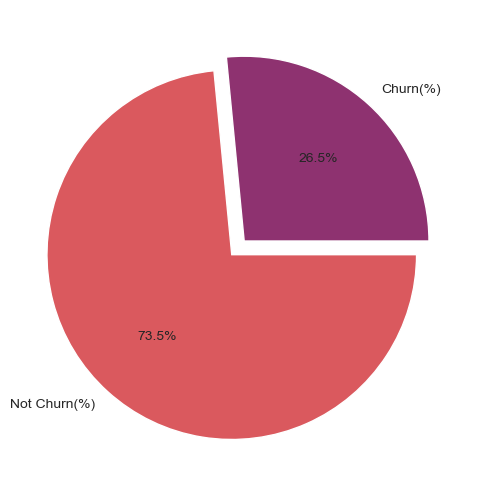

In [21]:
#make labels for churn rate and no churn rate.
label=["Churn(%)","Not Churn(%)"]
data=[churn_rate,1-churn_rate]

#visualise it with a pie chart
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(data,colors=rocket_palette,labels=label,autopct='%1.1f%%',explode=[0,0.1])
plt.show()


In [52]:
#Create a temporary dataframe by grouping the city and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('City')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
city_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
city_churned_rate.head(10)

,City,Churn,churned_rate
417,Los Angeles,90,0.048154
638,San Diego,50,0.026752
641,San Francisco,31,0.016586
645,San Jose,29,0.015516
629,Sacramento,26,0.013911
264,Fresno,16,0.008561
412,Long Beach,15,0.008026
509,Oakland,13,0.006956
277,Glendale,13,0.006956
713,Stockton,12,0.006421


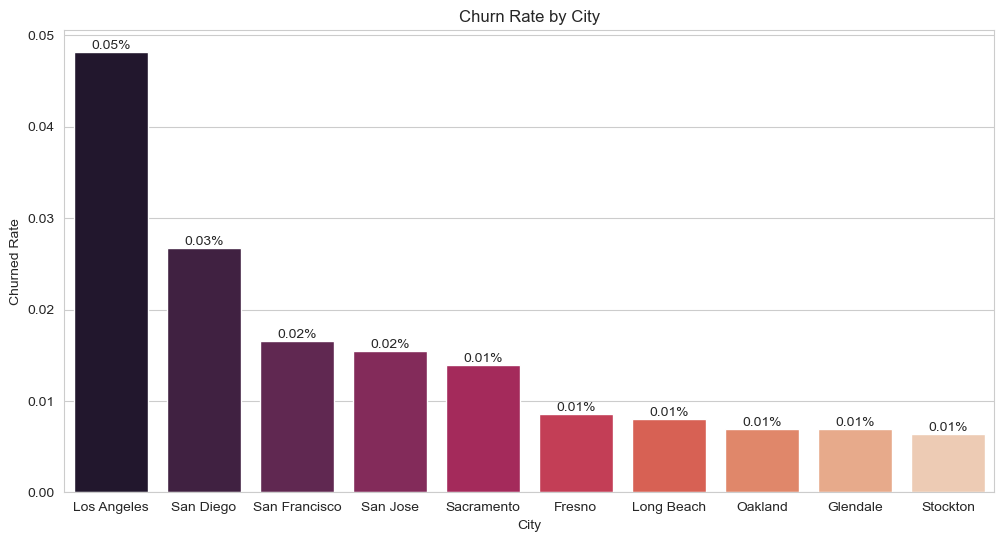

In [59]:
#Plot the Churn rate by City.
top_10=city_churned_rate.head(10)

plt.figure(figsize = (12,6))
ax = sns.barplot(x=top_10["City"], y=top_10["churned_rate"], palette='rocket')
plt.xlabel("City")
plt.ylabel("Churned Rate")
plt.title("Churn Rate by City")
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge', fontsize=10)
plt.show()

It can be seen that company is losing most of its customers from Los Angeles.

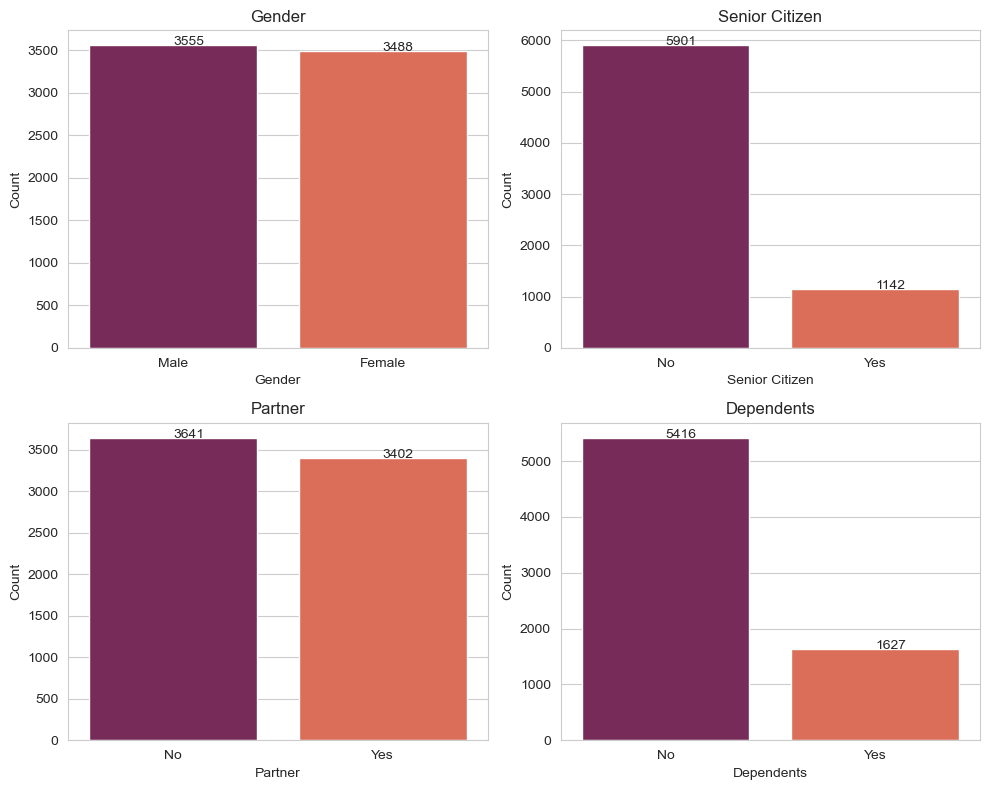

In [25]:
#Plot the count distubtion of customers in these categories through a bar graph.

# Demographic categories
demographic_categories = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through each demographic category and create a subplot
for i, category in enumerate(demographic_categories):
    # Get counts for the current category
    counts = df[category].value_counts()
    
    # Determine subplot position
    row = i // 2
    col = i % 2
    
    # Plot the data
    sns.barplot(x=counts.index, y=counts.values, palette="rocket", ax=axs[row, col]) 
    axs[row, col].set_title(category)
    axs[row, col].set_ylabel('Count')
    

    # Print the counts
    for j, count in enumerate(counts):
        axs[row, col].text(j, count, str(count))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [115]:
#Create a temporary dataframe by grouping the gender and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Gender')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column. 
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
gender_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
gender_churned_rate.head(10)

,Gender,Churn,churned_rate
0,Female,939,0.502408
1,Male,930,0.497592


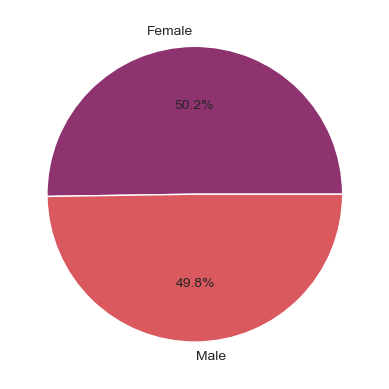

In [181]:
#visualize the churn rate for different genders through a pie chart
label=["Female","Male"]
sns.set_style("whitegrid")
plt.pie(gender_churned_rate["churned_rate"],colors=rocket_palette,labels=label,autopct='%1.1f%%')
plt.show()


In [117]:
#Create a temporary dataframe by grouping the senior citizen's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Senior Citizen')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
Senior_Citizen_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
Senior_Citizen_churned_rate.head(10)

,Senior Citizen,Churn,churned_rate
0,No,1393,0.745318
1,Yes,476,0.254682


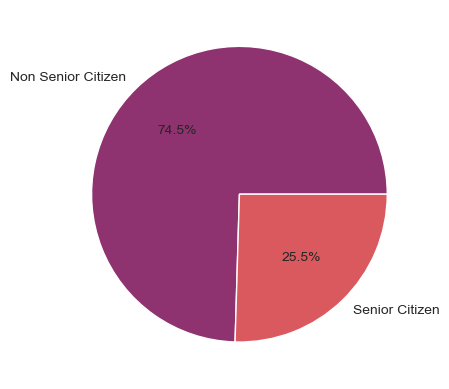

In [180]:
#visualize the churn rate for non senior citizen and senior citizen through a pie chart
label=["Non Senior Citizen","Senior Citizen"]
sns.set_style("whitegrid")
plt.pie(Senior_Citizen_churned_rate["churned_rate"],colors=rocket_palette,labels=label,autopct='%1.1f%%')
plt.show()


In [119]:
#Create a temporary dataframe by grouping the partner's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Partner')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
Partner_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
Partner_churned_rate.head(10)

,Partner,Churn,churned_rate
0,No,1200,0.642055
1,Yes,669,0.357945


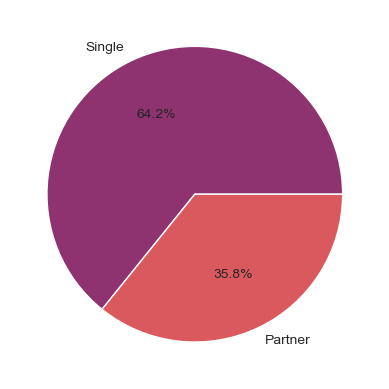

In [179]:
#visualize the churn rate for single and partner through a pie chart
label=["Single","Partner"]
sns.set_style("whitegrid")
plt.pie(Partner_churned_rate["churned_rate"],colors=rocket_palette,labels=label,autopct='%1.1f%%')
plt.show()

In [121]:
#Create a temporary dataframe by grouping the Dependent's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Dependents')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
Dependents_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
Dependents_churned_rate.head(10)

,Dependents,Churn,churned_rate
0,No,1763,0.943285
1,Yes,106,0.056715


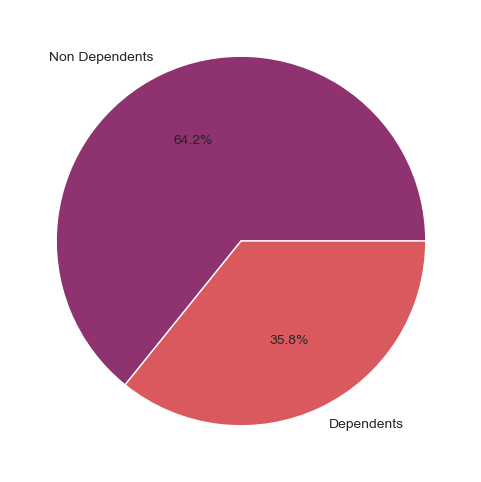

In [175]:
#visualize the churn rate for Non Depedents and Dependents through a pie chart
plt.figure(figsize=(6,6))
label=["Non Dependents","Dependents"]
sns.set_style("whitegrid")
plt.pie(Partner_churned_rate["churned_rate"],colors=rocket_palette, labels=label,autopct='%1.1f%%')
plt.show()

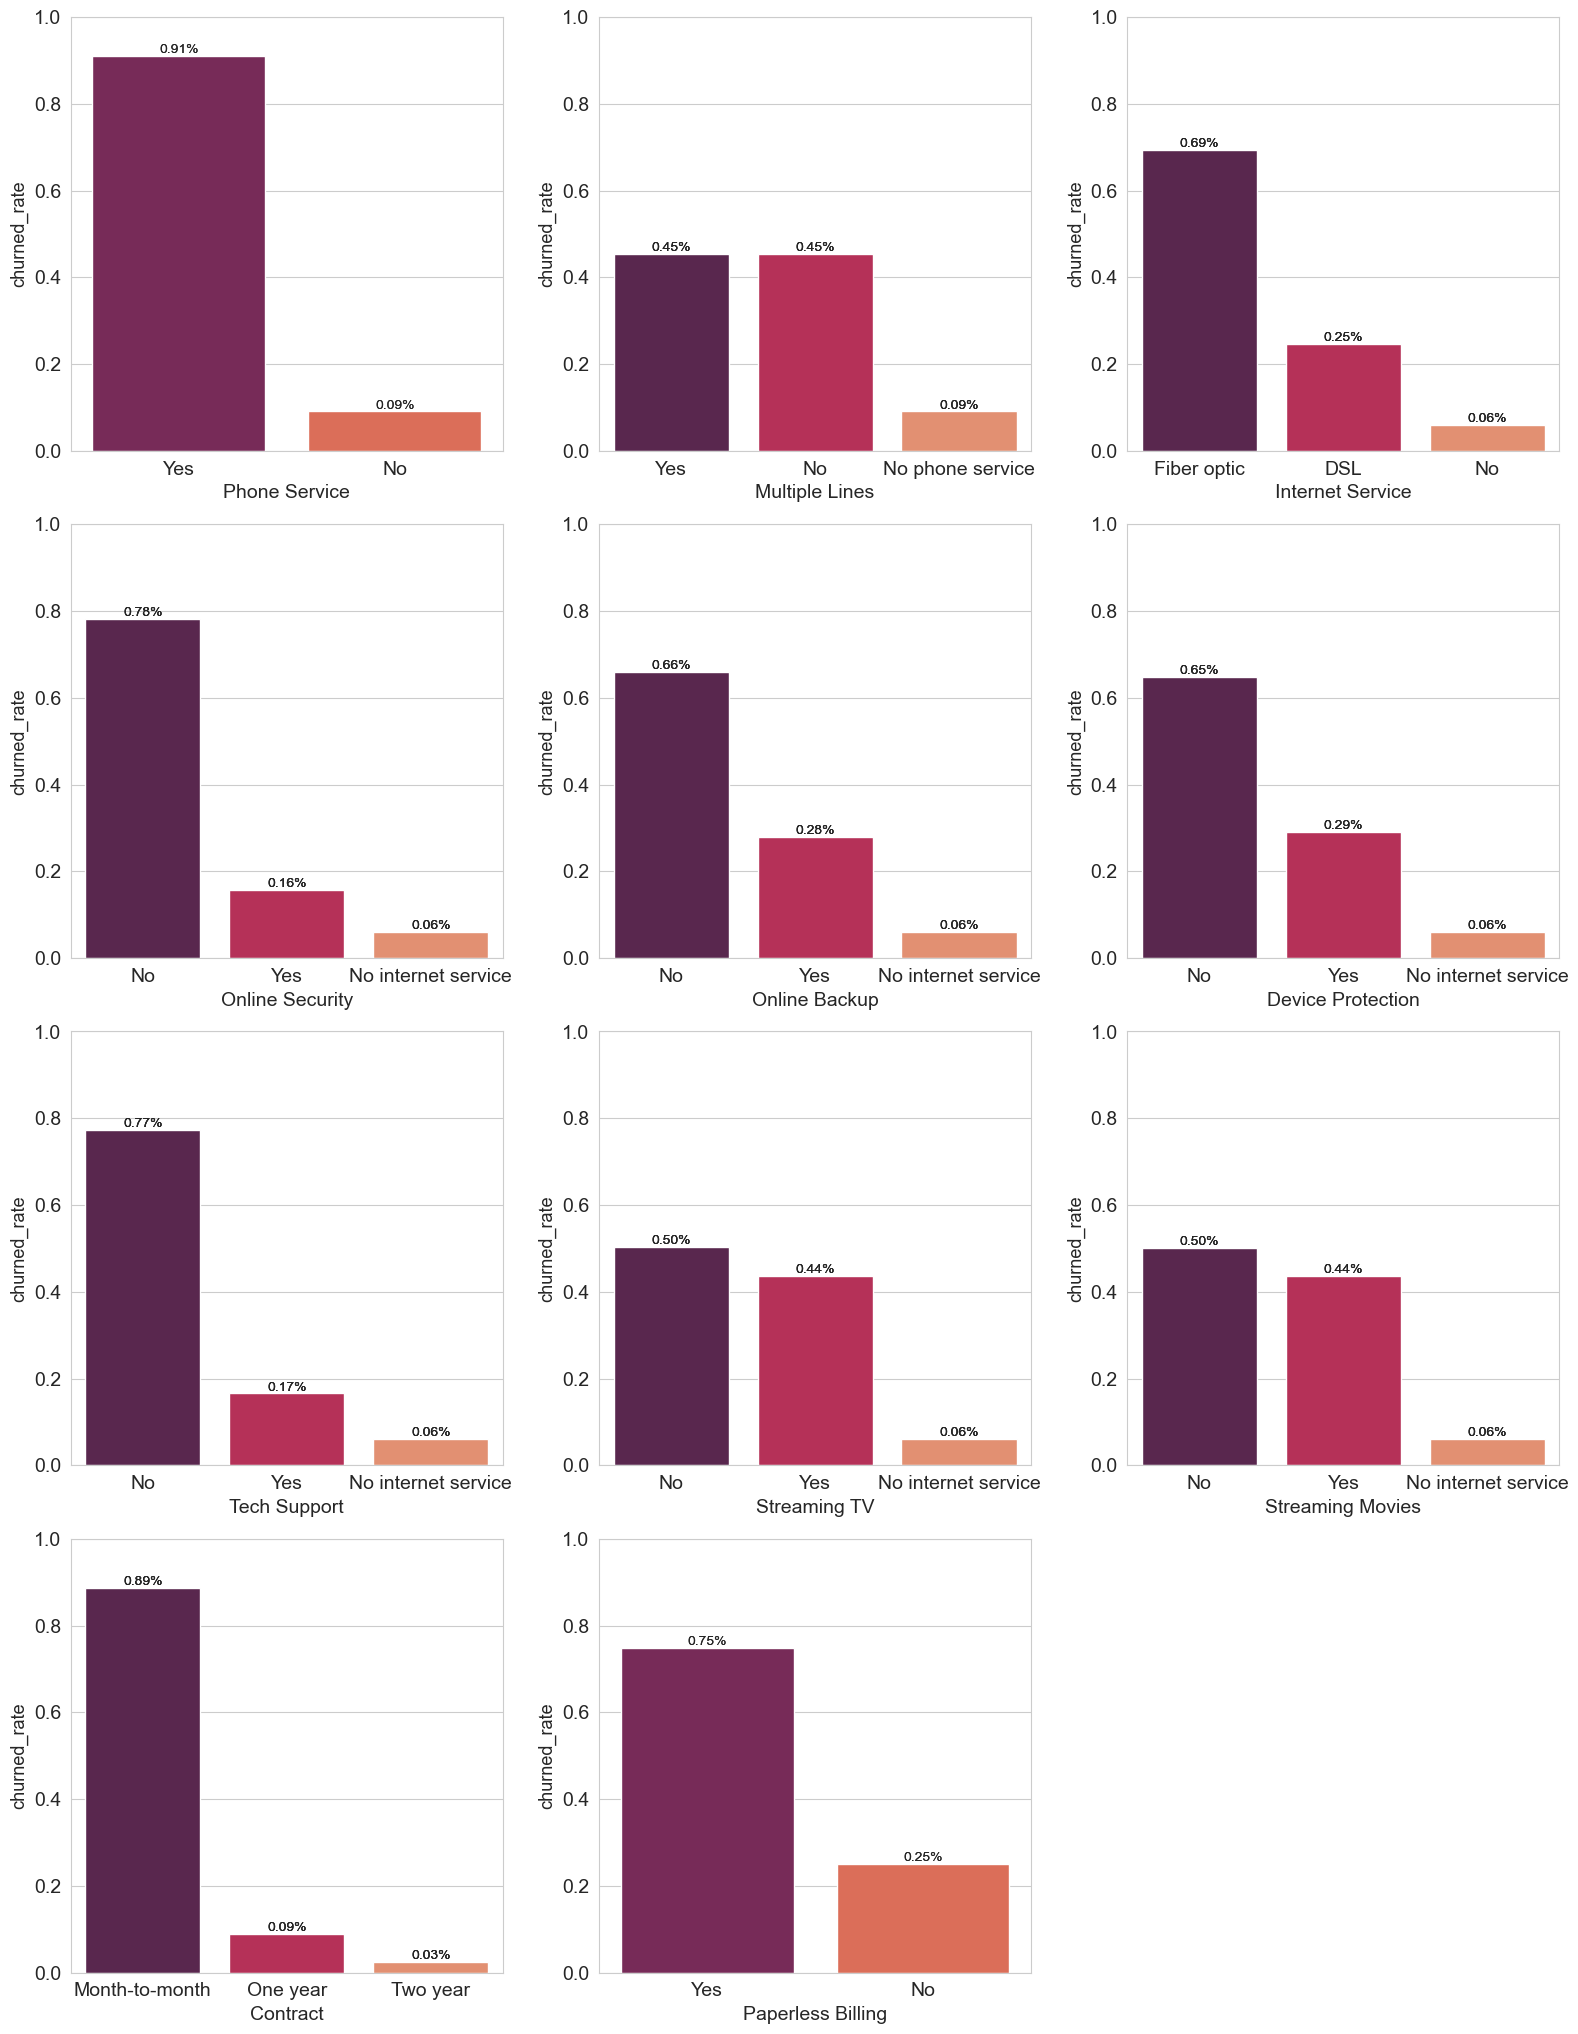

In [60]:
#Plot the churn rate against the different feature categories through a subplot graph.

# Features to analyze churn against
Features_categories = ['Phone Service', 'Multiple Lines', 'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
            'Paperless Billing']

# Create subplots
plt.figure(figsize=(16, 25))

for i, col in enumerate(Features_categories):    
    plt.subplot(5, 3, i + 1)
    
    # Group data by churn label and calculate the churn rate
    grouped_data= df[df['Churn Label'] == 'Yes'].groupby(col)['Churn Label'].count().reset_index(name='Churn')
    churned_customer = df["Churn Label"].value_counts()['Yes']
    for i in grouped_data:
        grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
    churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
    churned_rate.head(10)
    
    # Plot churn rate
    ax = sns.barplot(x=col, y="churned_rate", data=churned_rate, palette='rocket')
    
    for index, row in churned_rate.iterrows():
        ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge', fontsize=10)

    plt.xlabel(col, fontsize=14)
    plt.ylabel("churned_rate", fontsize=13)
    plt.ylim(0, 1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [63]:
#Create a temporary dataframe by grouping the Tenure Month's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Tenure Months')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
Tenure_month_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
Tenure_month_churned_rate.head(10)

,Tenure Months,Churn,churned_rate
0,1,380,0.203317
1,2,123,0.065811
2,3,94,0.050294
3,4,83,0.044409
4,5,64,0.034243
6,7,51,0.027287
8,9,46,0.024612
9,10,45,0.024077
7,8,42,0.022472
5,6,40,0.021402


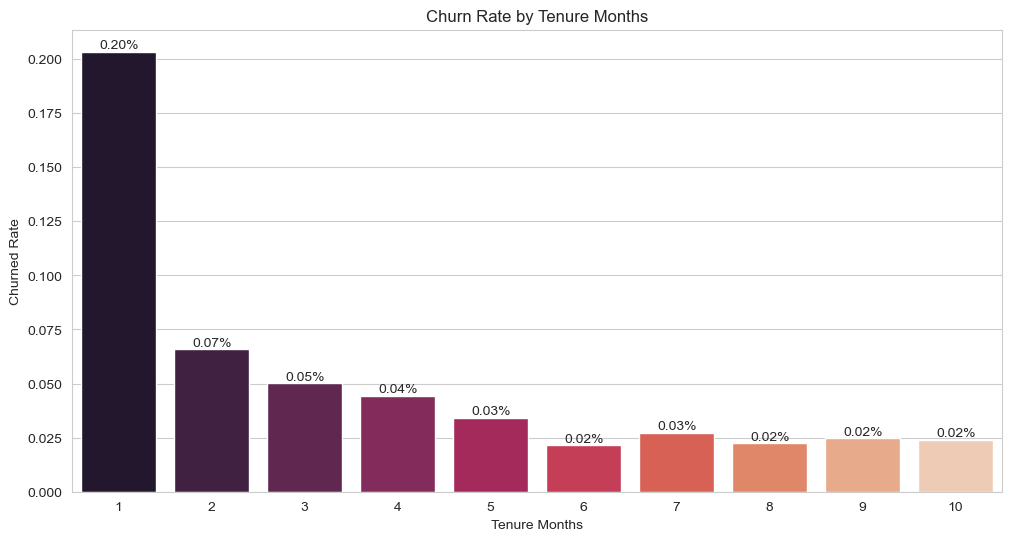

In [64]:
#visualize the churn rate for the different tenure months through a bar graph
top_10=Tenure_month_churned_rate.head(10)

plt.figure(figsize = (12,6))
ax = sns.barplot(x=top_10["Tenure Months"],y=top_10["churned_rate"],palette='rocket')
plt.xlabel("Tenure Months")
plt.ylabel("Churned Rate")
plt.title("Churn Rate by Tenure Months")
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge', fontsize=10)
plt.show()

In [65]:
#Create a temporary dataframe by grouping the Contract's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby('Contract')['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#Calculate the churn rate and create a new column.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
contract_churned_rate=grouped_data.sort_values(by="churned_rate", ascending=False)
contract_churned_rate.head(10)

,Contract,Churn,churned_rate
0,Month-to-month,1655,0.885500
1,One year,166,0.088818
2,Two year,48,0.025682


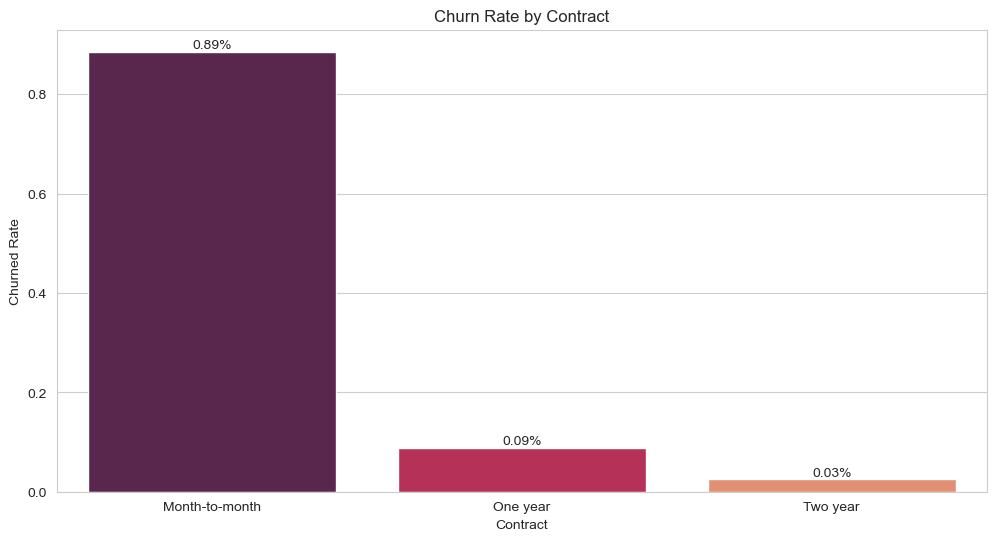

In [66]:
#visualize the churn rate for the different contracts through a bar graph
top_10=contract_churned_rate.head(10)
plt.figure(figsize = (12,6))
ax = sns.barplot(x=top_10["Contract"],y=top_10["churned_rate"],palette='rocket')
plt.xlabel("Contract")
plt.ylabel("Churned Rate")
plt.title("Churn Rate by Contract")
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge', fontsize=10)
plt.show()

In [128]:
#Create a temporary dataframe by grouping the Churn Reason's column and churn count.
grouped_data = df[df['Churn Label'] == 'Yes'].groupby("Churn Reason")['Churn Label'].count().reset_index(name='Churn')
churned_customer=df["Churn Label"].value_counts()['Yes']
#calculate the churn rate and create a new column for it.
for i in grouped_data:
    grouped_data["churned_rate"]=grouped_data["Churn"]/churned_customer
reason=grouped_data.sort_values(by="churned_rate", ascending=False)

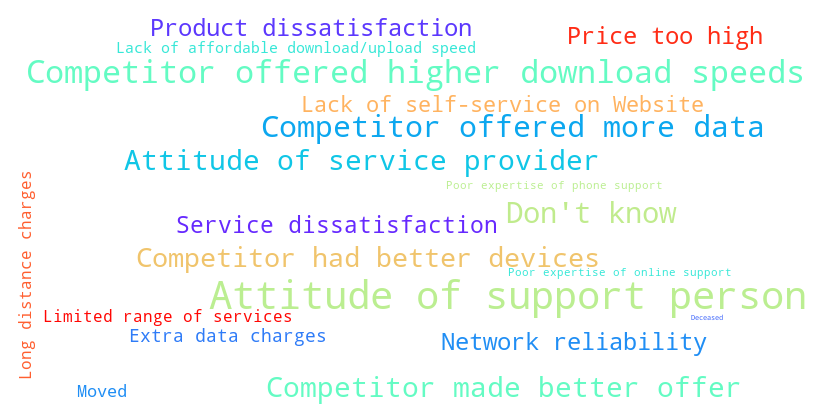

In [198]:

# Convert churn reasons and churn counts to a dictionary
churn_reasons = dict(zip(reason['Churn Reason'], reason['churned_rate']))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="rainbow").generate_from_frequencies(churn_reasons)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()